In [1]:
import numpy as np
import pandas as pd
import matplotlib as pyplot
import seaborn as sns

In [4]:
df = pd.read_csv('test(in).csv')
df

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com
...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,6/17/2011,johnny.palmer@enron.com
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,1/20/2011,johnny.palmer@enron.com
2188,(No Subject),Good to finally hear from. Judging from your ...,1/2/2011,don.baughman@enron.com
2189,League is Set,It looks like we have our 12 teams. We will p...,3/11/2011,rhonda.denton@enron.com


# Project Objective

The main goal is to evaluate employee sentiment and engagement by performing the following:

· **Sentiment Labeling**: Automatically label each message as Positive, Negative, or Neutral.

· **Exploratory Data Analysis (EDA)**: Analyze and visualize the data to understand its structure and underlying trends.

· **Employee Score Calculation**: Compute a monthly sentiment score for each employee based on their messages.

· **Employee Ranking**: Identify and rank employees by their sentiment scores.

· **Flight Risk Identification**: A Flight risk is any employee who has sent 4 or more negative mails in a given month.

· **Predictive Modeling**: Develop a linear regression model to further analyze sentiment trends.

# Task 1 : Sentiment Labeling

In [5]:
!pip install nltk

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mdsmb\AppData\Roaming\nltk_data...


True

In [8]:
sia = SentimentIntensityAnalyzer()

In [9]:
def label_sentiment(text):
    if pd.isna(text):
        return "Neutral"
    
    score = sia.polarity_scores(text)['compound']
    
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [10]:
df['sentiment'] = df['body'].apply(label_sentiment)

In [11]:
df[['body','sentiment']].head()

,body,sentiment
0,EnronOptions Announcement\n\n\nWe have updated...,Positive
1,"Marc,\n\nUnfortunately, today is not going to ...",Positive
2,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",Neutral
3,we were thinking papasitos (we can meet somewh...,Neutral
4,Since you never gave me the $20 for the last t...,Positive


In [12]:
df['sentiment'].value_counts()

sentiment
Positive    1528
Neutral      511
Negative     152
Name: count, dtype: int64

# Task 2 : EDA

In [14]:
df.shape

(2191, 5)

In [72]:
df.describe()

,date,email_length,sentiment_score,message_length
count,2191,2191.000000,2191.000000,2191.000000
mean,2010-12-31 02:17:21.716111360,260.469649,0.628024,260.469649
min,2010-01-01 00:00:00,1.000000,-1.000000,1.000000
25%,2010-06-30 12:00:00,83.000000,0.000000,83.000000
50%,2011-01-01 00:00:00,179.000000,1.000000,179.000000
75%,2011-06-30 12:00:00,355.000000,1.000000,355.000000
max,2011-12-31 00:00:00,999.000000,1.000000,999.000000
std,NaN,235.121212,0.610352,235.121212


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB


In [16]:
df.head()

,Subject,body,date,from,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com,Positive
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com,Neutral
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com,Positive


- Dataset contains 2191 records and 5 columns (after sentiment labeling).
- Columns include text, date, and categorical sentiment.
- Data types are mostly object/string.

In [17]:
df.isna().sum()

Subject      0
body         0
date         0
from         0
sentiment    0
dtype: int64

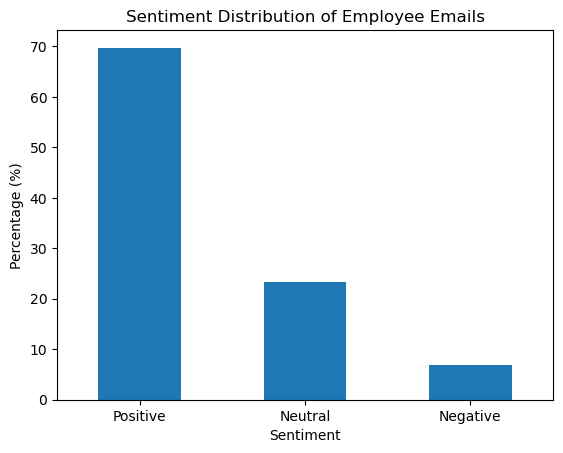

In [21]:
import matplotlib.pyplot as plt

(df['sentiment']
 .value_counts(normalize=True)
 .mul(100)
 .plot(kind='bar'))

plt.title("Sentiment Distribution of Employee Emails")
plt.xlabel("Sentiment")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.show()

###### Visualization Insight:
The bar chart clearly highlights the dominance of positive sentiment in employee emails. Neutral messages form a significant portion, reflecting standard operational communication, while negative sentiment is minimal. This visual distribution reinforces the conclusion that employee engagement and communication sentiment are generally favorable.

In [22]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

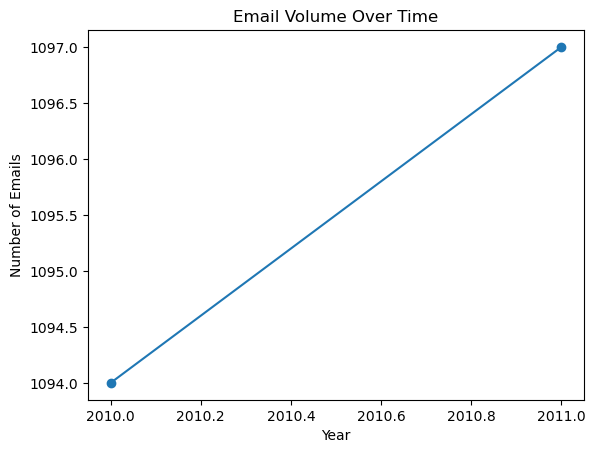

In [23]:
emails_per_year = df.groupby(df['date'].dt.year).size()

emails_per_year.plot(kind='line', marker='o')
plt.title("Email Volume Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Emails")
plt.show()

###### Email Volume Trend:
The email volume shows a slight increase over time, indicating growing communication activity within the organization. This may reflect increased collaboration, operational complexity, or organizational expansion. The relatively stable trend suggests consistent internal communication rather than sudden spikes or anomalies.

### Sentiment trend over time


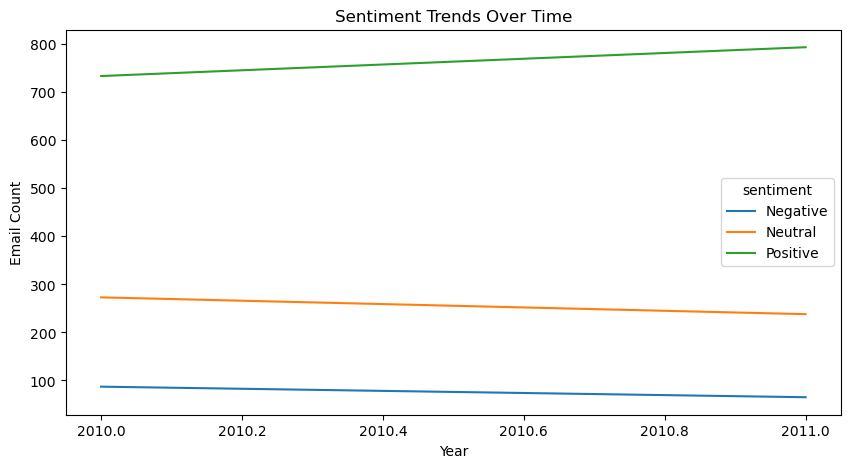

In [24]:
sentiment_trend = (
    df.groupby([df['date'].dt.year, 'sentiment'])
      .size()
      .unstack()
)

sentiment_trend.plot(figsize=(10,5))
plt.title("Sentiment Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Email Count")
plt.show()

###### Sentiment Trend Analysis:
Positive sentiment consistently dominates employee communication across the observed time period, while neutral messages form a steady secondary share. Negative sentiment remains comparatively low and stable. This suggests a generally healthy communication environment with limited persistent dissatisfaction.

### Employee engagement analysis


In [25]:
top_senders = df['from'].value_counts().head(10)
top_senders

from
lydia.delgado@enron.com        284
john.arnold@enron.com          256
sally.beck@enron.com           227
patti.thompson@enron.com       225
bobette.riner@ipgdirect.com    217
johnny.palmer@enron.com        213
don.baughman@enron.com         213
eric.bass@enron.com            210
kayne.coulter@enron.com        174
rhonda.denton@enron.com        172
Name: count, dtype: int64

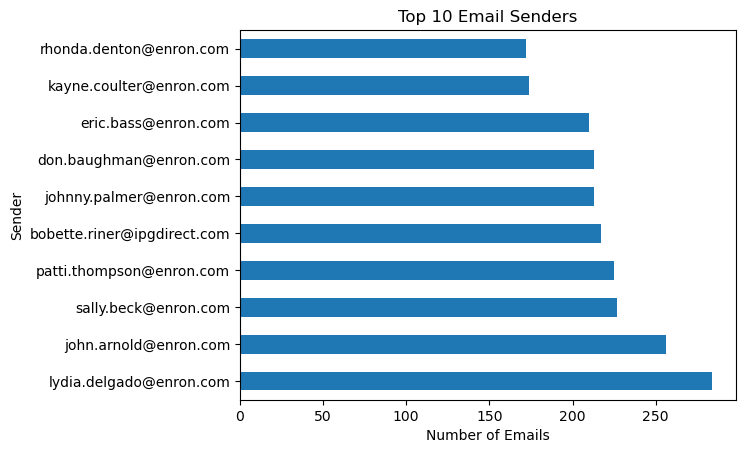

In [26]:
top_senders.plot(kind='barh')
plt.title("Top 10 Email Senders")
plt.xlabel("Number of Emails")
plt.ylabel("Sender")
plt.show()

###### Employee Engagement Insight:
A small subset of employees accounts for a disproportionately large share of email communication. This indicates centralized communication patterns, likely associated with managerial, coordination, or leadership roles within the organization.

### Additional patterns 

In [27]:
df['email_length'] = df['body'].apply(lambda x: len(str(x)))
df['email_length'].describe()

count    2191.000000
mean      260.469649
std       235.121212
min         1.000000
25%        83.000000
50%       179.000000
75%       355.000000
max       999.000000
Name: email_length, dtype: float64

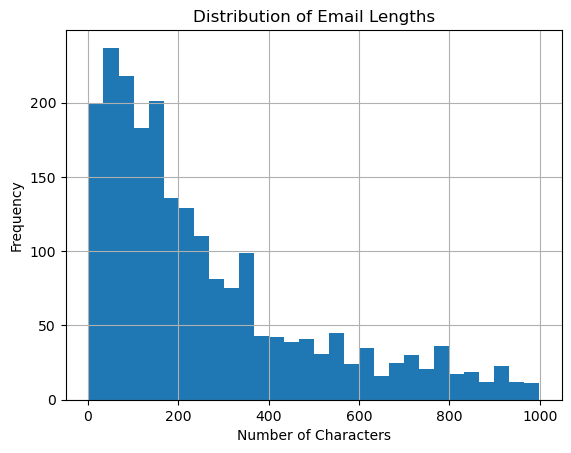

In [28]:
df['email_length'].hist(bins=30)
plt.title("Distribution of Email Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

###### Most emails are short to medium in length, indicating concise workplace communication. A small number of longer emails may represent detailed reports or formal announcements.

###### EDA Summary:
The exploratory data analysis reveals that the dataset is complete with no missing values and contains structured employee email communication data. Sentiment analysis shows that most emails carry a positive tone, followed by neutral messages, with very few negative emails.
Temporal analysis indicates consistent communication activity over time, with positive sentiment dominating across years. Engagement analysis highlights that a small number of employees contribute heavily to email communication, suggesting centralized roles.
Overall, the EDA provides a strong foundation for further analysis by identifying key trends, sentiment patterns, and engagement behavior within the organization.

# Task 3 : Employee Score Calculation

##### 1. Assign numeric score to each message

In [29]:
sentiment_score_map = {
    "Positive": 1,
    "Negative": -1,
    "Neutral": 0
}

df['sentiment_score'] = df['sentiment'].map(sentiment_score_map)

In [30]:
df[['sentiment', 'sentiment_score']].head()

,sentiment,sentiment_score
0,Positive,1
1,Positive,1
2,Neutral,0
3,Neutral,0
4,Positive,1


###### 2. extract month & year

In [31]:
df['year_month'] = df['date'].dt.to_period('M')

###### 3. aggregate monthly score per employee

In [32]:
monthly_employee_score = (
    df.groupby(['from', 'year_month'])['sentiment_score']
      .sum()
      .reset_index()
      .rename(columns={'sentiment_score': 'monthly_sentiment_score'})
)

In [33]:
monthly_employee_score.head()

,from,year_month,monthly_sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,6
3,bobette.riner@ipgdirect.com,2010-04,3
4,bobette.riner@ipgdirect.com,2010-05,2


###### 4. explanation of aggregation logic

###### 5. optional top & bottom employees by score

###### Highest sentiment employees

In [34]:
monthly_employee_score.sort_values(
    by='monthly_sentiment_score', 
    ascending=False
).head(10)

,from,year_month,monthly_sentiment_score
160,lydia.delgado@enron.com,2011-05,20
28,don.baughman@enron.com,2010-05,16
85,john.arnold@enron.com,2011-02,16
186,patti.thompson@enron.com,2011-07,16
54,eric.bass@enron.com,2010-07,15
142,kayne.coulter@enron.com,2011-11,15
83,john.arnold@enron.com,2010-12,15
153,lydia.delgado@enron.com,2010-10,14
157,lydia.delgado@enron.com,2011-02,14
182,patti.thompson@enron.com,2011-03,14


###### lowest sentiment employees

In [35]:
monthly_employee_score.sort_values(
    by='monthly_sentiment_score', 
    ascending=True
).head(10)

,from,year_month,monthly_sentiment_score
162,lydia.delgado@enron.com,2011-07,-1
61,eric.bass@enron.com,2011-02,-1
137,kayne.coulter@enron.com,2011-06,-1
21,bobette.riner@ipgdirect.com,2011-10,0
33,don.baughman@enron.com,2010-10,0
37,don.baughman@enron.com,2011-02,0
213,rhonda.denton@enron.com,2011-10,0
110,johnny.palmer@enron.com,2011-03,0
231,sally.beck@enron.com,2011-04,0
236,sally.beck@enron.com,2011-09,0


###### 6. visualization : distribution of monthly scores

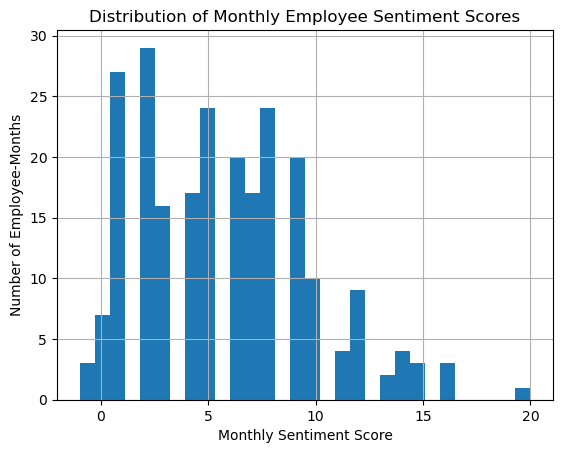

In [36]:
monthly_employee_score['monthly_sentiment_score'].hist(bins=30)
plt.title("Distribution of Monthly Employee Sentiment Scores")
plt.xlabel("Monthly Sentiment Score")
plt.ylabel("Number of Employee-Months")
plt.show()

###### Monthly sentiment scores were computed for each employee by assigning numeric values to message sentiment and aggregating them on a monthly basis. Positive messages contributed positively to the score, negative messages reduced the score, and neutral messages had no effect.
This approach ensures a transparent and interpretable scoring system that captures employee communication sentiment over time. The resulting scores can be used for further analysis such as employee ranking, engagement monitoring, and risk identification

# Task 4 : Employee Ranking

###### 1. choose a month for ranking

In [37]:
# check available months
monthly_employee_score['year_month'].unique()

<PeriodArray>
['2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06', '2010-07',
 '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02',
 '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
 '2011-10', '2011-11', '2011-12']
Length: 24, dtype: period[M]

In [38]:
selected_month = monthly_employee_score['year_month'].iloc[0]
selected_month

Period('2010-01', 'M')

###### 2. filter data for the selected month

In [39]:
monthly_data = monthly_employee_score[
    monthly_employee_score['year_month'] == selected_month
]

###### 3. top three positive employees

In [40]:
top_positive = (
    monthly_data
    .sort_values(
        by=['monthly_sentiment_score', 'from'],
        ascending=[False, True]
    )
    .head(3)
)

top_positive

,from,year_month,monthly_sentiment_score
120,kayne.coulter@enron.com,2010-01,13
48,eric.bass@enron.com,2010-01,9
144,lydia.delgado@enron.com,2010-01,9


###### 4. top 3 negative employees

In [42]:
top_negative = (
    monthly_data
    .sort_values(
        by=['monthly_sentiment_score', 'from'],
        ascending=[True, True]
    )
    .head(3)
)

top_negative

,from,year_month,monthly_sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
96,johnny.palmer@enron.com,2010-01,1
192,rhonda.denton@enron.com,2010-01,1


###### Top Three Negative Employees:
The following employees recorded the lowest (most negative) sentiment scores for the selected month. Employees were ranked in ascending order of monthly sentiment score, with alphabetical ordering applied in the case of ties.

###### 5. present rankings in a clean format

In [43]:
display(
    top_positive.rename(columns={
        'from': 'Employee',
        'monthly_sentiment_score': 'Sentiment Score'
    }),
    top_negative.rename(columns={
        'from': 'Employee',
        'monthly_sentiment_score': 'Sentiment Score'
    })
)

,Employee,year_month,Sentiment Score
120,kayne.coulter@enron.com,2010-01,13
48,eric.bass@enron.com,2010-01,9
144,lydia.delgado@enron.com,2010-01,9


,Employee,year_month,Sentiment Score
0,bobette.riner@ipgdirect.com,2010-01,1
96,johnny.palmer@enron.com,2010-01,1
192,rhonda.denton@enron.com,2010-01,1


###### Ranking Methodology:
Employee rankings were derived using monthly sentiment scores calculated in Task 3. Each employee’s sentiment score represents the cumulative effect of positive, neutral, and negative messages sent during the selected month.
Employees were ranked in descending order to identify the top three positive contributors and in ascending order to identify the top three negative contributors. Alphabetical ordering was applied as a secondary criterion to ensure consistent and reproducible rankings.
These rankings can be used to support employee engagement assessment, recognition of positive contributors, and identification of potential communication risks.

# Task 5 : flight risk identification

###### 1. filter only negative messages

In [44]:
negative_df = df[df['sentiment'] == 'Negative'].copy()

###### 2.sort data properly

In [45]:
negative_df = negative_df.sort_values(['from', 'date'])

###### 3. count negative emails in rolling 30 day window

In [54]:
# sort properly
negative_df = negative_df.sort_values(['from', 'date']).copy()

#helper column
negative_df['neg_count_30d'] = 0

for emp, grp in negative_df.groupby('from'):
    counts = (
        grp
        .set_index('date')
        .rolling('30D')
        .count()['sentiment']   # count negative mails
    )
    negative_df.loc[grp.index, 'neg_count_30d'] = counts.values

###### 4.identify flight risk employees

In [55]:
flight_risk_df = negative_df[negative_df['neg_count_30d'] >= 4]

###### 5. extract unique flight risk employees

In [57]:
flight_risk_employees1 = flight_risk_df['from'].unique()
flight_risk_employees1

array(['bobette.riner@ipgdirect.com', 'don.baughman@enron.com',
       'johnny.palmer@enron.com', 'sally.beck@enron.com'], dtype=object)

In [58]:
flight_risk_df[['from','date','neg_count_30d']].head()

,from,date,neg_count_30d
1437,bobette.riner@ipgdirect.com,2010-09-30,4
166,don.baughman@enron.com,2011-01-09,4
975,johnny.palmer@enron.com,2010-03-10,4
1168,johnny.palmer@enron.com,2010-03-16,4
195,sally.beck@enron.com,2011-08-22,4


###### 6. final list of employees at risk

In [59]:
flight_risk_summary = (
    flight_risk_df[['from']]
    .drop_duplicates()
    .reset_index(drop=True)
)

flight_risk_summary

,from
0,bobette.riner@ipgdirect.com
1,don.baughman@enron.com
2,johnny.palmer@enron.com
3,sally.beck@enron.com


###### Flight Risk Identification Methodology:
Flight risk was identified based on the frequency of negative email communications over a rolling 30-day window. Only messages labeled as negative sentiment were considered.
For each employee, the number of negative emails sent within the previous 30 days was calculated using a rolling time window. Employees who sent four or more negative emails within any 30-day period were flagged as flight risk candidates.
This approach is independent of calendar months and sentiment scores, ensuring that sustained negative communication patterns are captured accurately.

###### Rationale:
Rolling time windows provide a more realistic and responsive method for identifying behavioral risks compared to fixed monthly aggregation. This method ensures early detection of persistent negative sentiment, which can be indicative of disengagement, dissatisfaction, or burnout.

##### Report

# Task 6 : Predictive Modeling

###### 1. decide the target ( dependent variable)

In [60]:
monthly_employee_score

,from,year_month,monthly_sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,1
1,bobette.riner@ipgdirect.com,2010-02,7
2,bobette.riner@ipgdirect.com,2010-03,6
3,bobette.riner@ipgdirect.com,2010-04,3
4,bobette.riner@ipgdirect.com,2010-05,2
...,...,...,...
235,sally.beck@enron.com,2011-08,3
236,sally.beck@enron.com,2011-09,0
237,sally.beck@enron.com,2011-10,6
238,sally.beck@enron.com,2011-11,5


###### 2. create meanigful features

###### feature 1 : no.of messages per employee per month

In [61]:
msg_count = (
    df.groupby(['from', 'year_month'])
      .size()
      .reset_index(name='message_count')
)

###### feature 2 : average message length per month

In [62]:
df['message_length'] = df['body'].apply(lambda x: len(str(x)))

avg_length = (
    df.groupby(['from', 'year_month'])['message_length']
      .mean()
      .reset_index(name='avg_message_length')
)

###### 3. Merge features with target

In [63]:
model_df = monthly_employee_score.merge(
    msg_count, on=['from', 'year_month']
).merge(
    avg_length, on=['from', 'year_month']
)

In [64]:
model_df.head()

,from,year_month,monthly_sentiment_score,message_count,avg_message_length
0,bobette.riner@ipgdirect.com,2010-01,1,2,115.000000
1,bobette.riner@ipgdirect.com,2010-02,7,14,295.714286
2,bobette.riner@ipgdirect.com,2010-03,6,11,286.181818
3,bobette.riner@ipgdirect.com,2010-04,3,6,226.500000
4,bobette.riner@ipgdirect.com,2010-05,2,4,172.250000


###### 4. train test split

In [65]:
from sklearn.model_selection import train_test_split

X = model_df[['message_count', 'avg_message_length']]
y = model_df['monthly_sentiment_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###### 5. train LR model

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

###### 6.evaluate model performance

In [68]:
y_pred = lr.predict(X_test)

In [69]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3.3496574465159115, 0.7183250937343457)

###### 7. model  coefficient interpretation

In [70]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_
})

coef_df

,Feature,Coefficient
0,message_count,0.624272
1,avg_message_length,0.002342


##### Coefficient Interpretation:
- The positive coefficient for message_count indicates that higher communication frequency is associated with higher sentiment scores, suggesting that engaged employees tend to express more positive sentiment.
- The smaller coefficient for avg_message_length suggests a weaker but positive relationship between message length and sentiment, indicating that longer messages may slightly contribute to sentiment expression.

###### Overall Evaluation Summary

The predictive modeling task demonstrates that employee communication behavior can be quantitatively linked to sentiment trends. While the model is intentionally simple, it provides meaningful insights and establishes a baseline for future enhancements using more advanced NLP features or machine learning models.